# Data Cleaning and Transformation for Data Warehouse Model

## Imports

In [25]:
import pandas as pd

import matplotlib.pyplot as plt

## Data 
- Taken from Kaggle -> [Car Sales Report](https://www.kaggle.com/datasets/missionjee/car-sales-report)

In [26]:
car_sales_data = pd.read_csv("Data/Car_Sales_Data.csv")

original_data = pd.read_csv("Data/Car_Sales_Data.csv")


## Renaming Columns for better readability

In [27]:
car_sales_data.rename(columns={
    "Car_id":"Car_ID",
    "Date":"Sale_Date",
    "Annual Income":"Annual_Income",
    "Company":"Car_Manufacturer",
    "Model":"Car_Model",
    "Engine":"Engine_Type",
    "Color":"Colour",
    "Price ($)":"Sale_Price",
    "Dealer_No ":"Dealer_ID",
    "Body Style":"Body_Style",
    "Phone":"Customer_Phone_Number",
    "Customer Name":"Customer_Name"}, inplace=True)


## Data Inspection

In [28]:
car_sales_data.head()

,Car_ID,Sale_Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Car_Manufacturer,Car_Model,Engine_Type,Transmission,Colour,Sale_Price,Dealer_ID,Body_Style,Customer_Phone_Number,Dealer_Region
0,C_CND_000001,01/02/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,01/02/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,01/02/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,01/02/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,01/02/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


### Car_ID Column 
- Unique Identifier for each car sold

In [29]:
car_sales_data["Car_ID"].value_counts()
# Each value is unique this column will be used for identifying each car sold may change to just incremntal ID later

car_sales_data["Car_ID"] = car_sales_data["Car_ID"].astype("string")

### Sale_Date Column
- Date the car was sold

In [30]:
car_sales_data["Sale_Date"].value_counts()

# Dates were formmated as mdy so converted to datetime format stored now as ymd
car_sales_data["Sale_Date"] = pd.to_datetime(car_sales_data["Sale_Date"], format="%m/%d/%Y")

### Customer_Name Column
- Name of the Customer who bought the car

In [31]:
car_sales_data[["Customer_Name","Gender","Annual_Income","Customer_Phone_Number"]].value_counts()

# Since we only have the first name of each customer by cross referencing other columns associated with the customer, 
# we will take an asumption that each customer is unique as seen in the value counts and for arguments sake

car_sales_data["Customer_Name"] = car_sales_data["Customer_Name"].astype("string")

### Gender Column
- Gender of the customer who bought the car

In [32]:
# Looks like a lot of customer gender is incorrect showing that the customer is male but the name is a female name so will try change as many as possible
car_sales_data[["Gender","Customer_Name"]].value_counts()

# Creating a count of all names that are currently classed as Male
male_customers = car_sales_data[["Gender","Customer_Name"]][car_sales_data["Gender"] == "Male"].value_counts()

# List of names that are currently classed as male
male_to_female = [
    "Nicole","Zoey","Aria","Allison","Sofia","Amber","Alexandra","Jessica","Lena","Layla","Eli","Mathilde","Ava","Audrey","Stella","Kaylee","Fatima","Sophie","Sara",
    "Anna","Naomi","Kylie","Abigail","Lily","Arianna","Emily","Brianna","Grace","Isabella","Hannah","Rachel","Elizabeth","Kayla","Christina","Kaitlyn","Amanda",
    "Sophia","Lola","Ariana","Julia","Ashley","Rebecca","Jasmine","Natalie","Samantha","Alyssa","Amelia","Maya","Juliette","Melanie","Mia","Hailey","Michelle",
    "Lauren","Emma","Chloe", "Lea", "Sarah","Camille","Laura","Eva", "Jade","Avery","Zoe","Ariel","Alice","Julie","Charlotte","Clara","Angelina", "Olivia",
    "Victoria", "Leah","Madison", "Isabel", "Claire", "Elena", "Ella","Marie","Nina","Savannah","Gabriella","Laila", "Sabrina","Katherine","Vanessa","Bella",
    "Mackenzie", "Isabelle", "Leila", "Gianna", "Evelyn", "Aisha", "Madelyn", "Kate", "Peyton", "Fiona", "Khloe", "Annabelle", "Makayla", "Madeline", "Caroline",
    "Amy", "Melody", "Penelope", "Skylar", "Alicia", "Paige", "Sydney", "Pauline", "Aubrey", "Katelyn", "Elise", "Rose", "Natalia", "Catherine", "Alina", "Jennifer",
    "Esther", "Gia", "Margot", "Alexa", "Maryam", "Lucia", "Mikayla", "Iris", "Jocelyn", "Mariam", "Vivian", "Cecilia", "Celia", "Serena", "Sienna", "Liana", "Amina",
    "Danielle", "Chelsea", "Eileen", "Lucie", "Summer", "Alana", "Elisa", "Stephanie", "Joyce", "Megan", "Amandine"]

# Locating names that are in the male to female list and changing their gender to Female
car_sales_data.loc[(car_sales_data["Customer_Name"].isin(male_to_female)) & (car_sales_data["Gender"] == "Male"), "Gender" ] = "Female"

### Annual Income Column
- Annual Income of the Customer

(array([1.7551e+04, 5.3660e+03, 7.8900e+02, 1.3700e+02, 4.7000e+01,
        1.2000e+01, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0080000e+04, 1.1290720e+06, 2.2480640e+06, 3.3670560e+06,
        4.4860480e+06, 5.6050400e+06, 6.7240320e+06, 7.8430240e+06,
        8.9620160e+06, 1.0081008e+07, 1.1200000e+07]),
 <BarContainer object of 10 artists>)

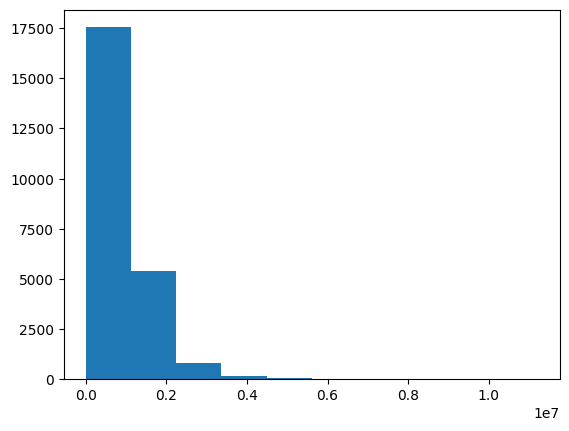

In [33]:
# Data is not normally distributed and is right skewed
plt.hist(car_sales_data["Annual_Income"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f1ac348e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1f1ac337ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f1ac356810>],
 'medians': [<matplotlib.lines.Line2D at 0x1f1ac336910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f1ac336150>],
 'means': []}

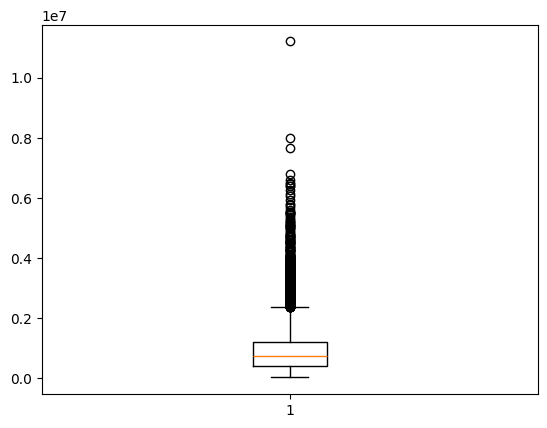

In [34]:
plt.boxplot(car_sales_data["Annual_Income"])
# Definitley some outliers dont think will do anything about them yet

### Dealer Name Column
- Name of the Dealer the car was sold at

In [35]:
car_sales_data["Dealer_Name"].value_counts()

# All unique values and doesnt look like any spelling errors so will leave these

car_sales_data["Dealer_Name"] = car_sales_data["Dealer_Name"].astype("string")

### Car Manufacturer column
- Name of the Manufacturer of the car sold

In [36]:
car_sales_data["Car_Manufacturer"].value_counts()

# No spelling errors all unique values

car_sales_data["Car_Manufacturer"] = car_sales_data["Car_Manufacturer"].astype("string")

### Car Model Column
- Model of the car sold

In [37]:
car_models = car_sales_data["Car_Model"].value_counts()

car_sales_data[car_sales_data["Car_Manufacturer"] == "Saab"]["Car_Model"].value_counts()

# Saab Model 9-3 and 9-5 has been automatically changed to 03-Sept and 05-Sept need to fix this

# Creating a lookup to change the values accordingly
saab_models = {
    "03-Sept":"9-3",
    "05-Sept":"9-5"
}

# Replacing the values from the lookup table with correct values
car_sales_data.replace({"Car_Model":saab_models},inplace=True)

car_sales_data["Car_Model"] = car_sales_data["Car_Model"].astype("string")


In [38]:
car_sales_data[car_sales_data["Car_Manufacturer"] == "Saab"]["Car_Model"].value_counts()
# Checking values changed which they did


Car_Model
9-3    171
9-5     39
Name: count, dtype: Int64

In [39]:
original_data[original_data["Company"] == "Saab"]["Model"].value_counts()
# Checking Values have stayed the same as the original data which they have


Model
03-Sept    171
05-Sept     39
Name: count, dtype: int64

### Engine Type Column
- Type of Engine in the car

In [40]:
car_sales_data["Engine_Type"].value_counts()

# The Double Overhead Camshaft contains a weird value Â will replace this value

car_sales_data["Engine_Type"] = car_sales_data["Engine_Type"].str.replace("Â","")

car_sales_data["Engine_Type"] = car_sales_data["Engine_Type"].astype("string")

### Transmission Column
- Transmission of the car sold

In [41]:
car_sales_data["Transmission"].value_counts()

# Values look fine only two types Manual and Automatic

car_sales_data["Transmission"] = car_sales_data["Transmission"].astype("string")

### Colour Column
- Colour of the car sold

In [42]:
car_sales_data["Colour"].value_counts()

# Values look fine only three types Red, Black and Pale White

car_sales_data["Colour"] = car_sales_data["Colour"].astype("string")

### Sale price column 
- Price the car was sold for

(array([ 288., 5862., 8578., 3387., 2394., 1501.,  623.,  375.,  678.,
         220.]),
 array([ 1200.,  9660., 18120., 26580., 35040., 43500., 51960., 60420.,
        68880., 77340., 85800.]),
 <BarContainer object of 10 artists>)

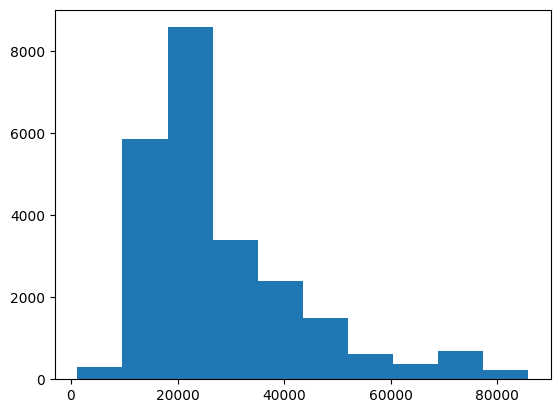

In [43]:
car_sales_data["Sale_Price"].value_counts()

plt.hist(car_sales_data["Sale_Price"])
# Data is fairly normally distributed slightly right skewed

### Dealer_ID
- Unique Identifier of the Dealer

In [44]:
car_sales_data["Dealer_ID"].nunique()

# Number of unique dealers shows only 7 but there are 28 dealers in the Dealer name column need to investigate this

car_sales_data[["Dealer_ID", "Dealer_Name"]].value_counts()
# Clearly the Dealer ID is not unique so will create a new dealer id column

dealer_id_column_mapping = {
            "Buddy Storbeck's Diesel Service Inc":"D1",
                                'C & M Motors Inc':"D2",
                                     'Capitol KIA':"D3",
                          'Chrysler of Tri-Cities':"D4",
                               'Chrysler Plymouth':"D5",
                                   'Classic Chevy':"D6",
                         'Clay Johnson Auto Sales':"D7",
                                       'U-Haul CO':"D8",
                            'Rabun Used Car Sales':"D9",
                                   'Race Car Help':"D10",
                                'Saab-Belle Dodge':"D11",
               'Scrivener Performance Engineering':"D12",
                              'Diehl Motor CO Inc':"D13",
                            'Star Enterprises Inc':"D14",
                                   'Suburban Ford':"D15",
                              'Tri-State Mack Inc':"D16",
 'Progressive Shippers Cooperative Association No':"D17",
                  'Ryder Truck Rental and Leasing':"D18",
                           'Enterprise Rent A Car':"D19",
                      'Gartner Buick Hyundai Saab':"D20",
                             'Hatfield Volkswagen':"D21",
                                 'Iceberg Rentals':"D22",
                    'McKinney Dodge Chrysler Jeep':"D23",
                     'Motor Vehicle Branch Office':"D24",
                                  'Nebo Chevrolet':"D25",
                 'New Castle Ford Lincoln Mercury':"D26",
                                 'Pars Auto Sales':"D27",
           'Pitre Buick-Pontiac-Gmc of Scottsdale':"D28"
}

car_sales_data["Dealer_ID"] = car_sales_data["Dealer_Name"].map(dealer_id_column_mapping)

car_sales_data["Dealer_ID"] = car_sales_data["Dealer_ID"].astype("string")




### Body Style Column
- Body style of the car sold

In [45]:
car_sales_data["Body_Style"].value_counts()
# Values look fine no changes needed

car_sales_data["Body_Style"] = car_sales_data["Body_Style"].astype("string")


### Customer Phone number Column
- Phone Number associated with the sale 

In [46]:
car_sales_data["Customer_Phone_Number"].value_counts()

# Values look fine no changes needed

car_sales_data["Customer_Phone_Number"] = car_sales_data["Customer_Phone_Number"].astype("string")


### Dealer Region Column
- Area in which the Dealer is located in

In [47]:
car_sales_data["Dealer_Region"].value_counts()

# Values look fine will create a State column to help with more general analysis 

state_column_mapping = {
    "Austin":"Texas",
    "Janesville":"Wisconsin",
    "Scottsdale":"Arizona",
    "Pasco":"Washington",
    "Aurora":"Colarado",
    "Middletown":"Ohio",
    "Greenville":"South Carolina"    
}

car_sales_data["Dealer_State"] = car_sales_data["Dealer_Region"].map(state_column_mapping).astype("string")

### Writing cleaned data to csv

In [48]:
car_sales_data.to_csv("Data/Cleaned_Car_Sales_Data.csv", index=False)